# Introduction

Sorting is organising data in ascending or descending order. This project will take a comparative look at 6 sorting algorithms (Bubble Sort, Merge Sort, Counting Sort, Quick Sort, Insertion Sort, BogoSort). It is in two parts, firstly an overview of each algorithm and lastly the benchmarking application of the sorting algorithms.

### Sorting Algorithms Overview:
1. How it works 
2. Performance or Time complexity. Time Complexity is the computational complexity that describes the amount of time it takes to run an algorithm. (source: https://en.wikipedia.org/wiki/Time_complexity)
3. An example diagram of how it works
4. A python example of the selected algorithm (with comments) 

This project will also highlight the different sorting methods used in each algorithm whether the are comparison based or non-comparison based. 

### The Benchmarking Application

Using python(https://www.python.org/), random number arrays were created ranging in sizes from 100 to 50,000. The sorting algorithms will each run through the arrays and the timings will be captured using Python’s time module (https://docs.python.org/3/library/time.html). These timings are collected into a table, using the library pandas tables https://pandas.pydata.org/. The timings will be benchmarked against one another in a plot using Seaborn https://seaborn.pydata.org/ and Matplotlib https://matplotlib.org/. 

The result of the benchmarking sorting algorithm application are discussed to see if they matched the expected output. 
 
This project is written using a Jupyter notebook (https://jupyter.org/) using external python files.

# Sorting Algorithms


## 1. Bubble Sort (A simple comparison-based sort)

Bubble sort is a simple sorting algorithm. source:https://en.wikipedia.org/wiki/Bubble_sort Named for the way larger values bubble up to the top. It is a comparison based sorting algorithm as it steps through the list, compares and swaps adjacent pairs if they are in the wrong order.

How it works:
1. It starts at the beginning of the dataset and compares the first two elements and if the first is greater it will swap them. 
2. It will continue doing this until no swaps are needed.

#### Performance
Bubble sort has a worst-case and average time complexity of О(n2), where n is the number of items being sorted. 
When the list is already sorted (best-case), the complexity of bubble sort is only O(n). 
In the case of a large dataset, Bubble sort should be avoided. It is not very practical or efficient and rarely used in the real world.

Bubble sort in action https://www.youtube.com/watch?v=lyZQPjUT5B4&feature=youtu.be

#### Bubble Sort Diagram

![title](bubblesort.png)

In [17]:
# code sourced from http://interactivepython.org/runestone/static/pythonds/SortSearch/TheBubbleSort.html

# calls a function bubblesort
def bubbleSort(alist):
    for passnum in range(len(alist)-1,0,-1):
        for i in range(passnum):
            if alist[i]>alist[i+1]:
                temp = alist[i]
                alist[i] = alist[i+1]
                alist[i+1] = temp

alist = [54,26,93,17,77]

bubbleSort(alist)

print(alist)

[17, 26, 54, 77, 93]


## 2. Merge Sort (An efficient comparison-based sort)

Merge sort is a recursive divide and conquer algorithm that was invented by John von Neumann in 1945. This algorithm breaks down the array into a sublists until there is just a single element left and merging them back together until they are sorted. (https://en.wikipedia.org/wiki/Merge_sort)

How it works:
1. It starts by breaking down the list into sublists until each sublists contains just one element. 
2. Repeatedly merging the sublists to produce new sorted sublists until there is only one sublist remaining.

#### Performance
In sorting n objects, merge sort has an average and worst-case performance of O(n log n). It's best, worst and average cases are very similar, making it a good choice for predictable running behaviour. (Source: P.Mannion (2019)Week 10: Sorting Algorithms Part 3, Galway-Mayo Institute of Technology )

Merge sort in action:
https://www.youtube.com/watch?v=XaqR3G_NVoo


#### Merge Sort Diagram

![title](mergesort.png)

In [18]:
# code sourced from http://interactivepython.org/runestone/static/pythonds/SortSearch/TheMergeSort.html

def mergeSort(alist):
    # print("Splitting ",alist)
    # if the array is greater than 1 then
    if len(alist)>1:
        # mid is length of array divided 2
        mid = len(alist)//2
        # left half is equal to the first slice
        lefthalf = alist[:mid]
        # left half is equal to the second slice
        righthalf = alist[mid:]
        
        # call merge sort again for the left half
        mergeSort(lefthalf)
        
        # call merge sort again for the right half
        mergeSort(righthalf)

        i=0
        j=0
        k=0
        
        # copy to temp arrays lefthalf and righhalf
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] < righthalf[j]:
                alist[k]=lefthalf[i]
                i=i+1
            else:
                alist[k]=righthalf[j]
                j=j+1
            k=k+1
         
       #  
        while i < len(lefthalf):
            alist[k]=lefthalf[i]
            i=i+1
            k=k+1

        while j < len(righthalf):
            alist[k]=righthalf[j]
            j=j+1
            k=k+1
    #print("Merging ",alist)

alist = [54,26,93,17,77,31,44,55,20]
mergeSort(alist)
print(alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


## 3. Counting Sort (A non-comparison sort)

Invented by Harold H. Seward in 1954(source: https://en.wikipedia.org/wiki/Counting_sort.) Counting sort is a technique based on key values(kind of hashing). Then doing some arithemtic to calculate the position of the each object in the output sequence. (https://www.geeksforgeeks.org/counting-sort/) 

How it works (Source: P.Mannion (2019)Week 10: Sorting Algorithms Part 3, Galway-Mayo Institute of Technology )
:

1. Determine key range k in the input array(if not already known)
2. Initialise an array count size k, which will be used to count the number of times that each key value appears in the input instance.
3. Initialise an array result of size n, which will be used to store the sorted output.
4. Iterate through the input array, and record the number of times each distinct key values occurs in the input instance.
5. Construct the sorted result array, based on the histogram of key frequencies stored in count. Refer to the ordering of keys in input to ensure that stability is preserved.

#### Performance

Best-, worst- and average-case time complexity of n +k, space complexity is also n+k (Source: P.Mannion (2019)Week 10: Sorting Algorithms Part 3, Galway-Mayo Institute of Technology )

#### Counting Sort Diagram

![title](countsort.png)

In [19]:
# code sourced http://www.learntosolveit.com/python/algorithm_countingsort.html
def counting_sort(array, maxval):
    """in-place counting sort"""
    n = len(array)
    m = maxval + 1
    count = [0] * m               # init with zeros
    for a in array:
        count[a] += 1             # count occurences
    i = 0
    for a in range(m):            # emit
        for c in range(count[a]): # - emit 'count[a]' copies of 'a'
            array[i] = a
            i += 1
    return array

print(counting_sort( alist, 93 ))

[17, 20, 26, 31, 44, 54, 55, 77, 93]


## 4. Quick Sort

Quicksort was developed by British computer scientist Tony Hoare in 1959. It is a recursive divide and conquer algorithm. Due to it's efficiency, it is still a commonly used algorithm for sorting.(https://en.wikipedia.org/wiki/Quicksort)

How it works (Source: P.Mannion (2019) Week 10: Sorting Algorithms Part 3, Galway-Mayo Institute of Technology):
1. Pivot selection: Pick an element, called a “pivot” from the array
2. Partioning: reorder the array elements with values < the pivot come before it, which all elements the values ≥ than the pivot come after it. After this partioining, the pivot is in its final position.
3. Recursion: apply steps 1 and 2 above recursively to each of the two subarrays

#### Performance

It has a worst case n^2 (rare), average case n log n, best case n log n
Memory usage: O(n) (variants exist with O (n log n)) (Source: P.Mannion (2019) Week 10: Sorting Algorithms Part 3, Galway-Mayo Institute of Technology):

#### Quick Sort Diagram

![title](quicksort.png)

In [20]:
# http://interactivepython.org/runestone/static/pythonds/SortSearch/TheQuickSort.html

def quickSort(alist):
   quickSortHelper(alist,0,len(alist)-1)

def quickSortHelper(alist,first,last):
   if first<last:

       splitpoint = partition(alist,first,last)

       quickSortHelper(alist,first,splitpoint-1)
       quickSortHelper(alist,splitpoint+1,last)


def partition(alist,first,last):
   pivotvalue = alist[first]

   leftmark = first+1
   rightmark = last

   done = False
   while not done:

       while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
           leftmark = leftmark + 1

       while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
           rightmark = rightmark -1

       if rightmark < leftmark:
           done = True
       else:
           temp = alist[leftmark]
           alist[leftmark] = alist[rightmark]
           alist[rightmark] = temp

   temp = alist[first]
   alist[first] = alist[rightmark]
   alist[rightmark] = temp


   return rightmark

# alist = [54,26,93,17,77,31,44,55,20]
quickSort(alist)
print(alist)


[17, 20, 26, 31, 44, 54, 55, 77, 93]


## 5. Insertion Sort

Insertion sort is a simple sorting algorithm that builds the final sorted array (or list) one item at a time. It is much less efficient on large lists than more advanced algorithms such as quicksort, heapsort, or merge sort. (https://en.wikipedia.org/wiki/Insertion_sort) It sorts similar to the way card players sort their cards in their hand (Source: P.Mannion (2019) Week 10: Sorting Algorithms Part 2, Galway-Mayo Institute of Technology)

How it works (Source: P.Mannion (2019) Week 10: Sorting Algorithms Part 2, Galway-Mayo Institute of Technology):
1. Start from the left of the array, and set the “key” as the element at index 1.Move any elements to the left which are > the “key” right by one position, and insert the “key”.
2. Set the “Key” as the element at index 2. Move any elements to the left which are > the key right by one position and insert the key.
3. Set the “key” as the element at the index 3. Move any elements to the left which are > the key right by one position and index the key.
4. …
5. Set the “key” as the elements at index n-1. Move any elements to the left which are > the key right by one position and insert the key.


https://www.youtube.com/watch?v=ROalU379l3U

#### Performance

This algorithm works well on small lists and lists that are close to sorted. The best case is an array that is already sorted. In this case, insertsion sort would have a run time of O(n). Worst case would be that no numbers are sorted, giving a run time of O(n2). The average is also O(n2). https://en.wikipedia.org/wiki/Insertion_sort 

####  Insertion Sort Diagram


![title](insertionsort.png)

In [21]:
def insertionSort(alist):
   for index in range(1,len(alist)):

     currentvalue = alist[index]
     position = index

     while position>0 and alist[position-1]>currentvalue:
         alist[position]=alist[position-1]
         position = position-1

     alist[position]=currentvalue

alist = [54,26,93,17,77,31,44,55,20]
insertionSort(alist)
print(alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


## 6. BogoSort

Bogosort is a highly inefficient sorting algorithm. Also known as slowsort, https://en.wikipedia.org/wiki/Bogosort

How it works:
1. It randomly shuffles the array until it is sorted.


#### Performance
The best case occurs if the list as given is already sorted. 


https://www.youtube.com/watch?v=CSe0MWDLevA
#### BogoSort Diagram


![title](bogosort.png)

In [22]:
# Python program for implementation of Bogo Sort 
import random 
# Sorts array a[0..n-1] using Bogo sort 
def bogoSort(alist): 
    n = len(alist) 
    while (is_sorted(alist)== False): 
        shuffle(alist) 
  
# To check if array is sorted or not 
def is_sorted(alist): 
    n = len(alist) 
    for i in range(0, n-1): 
        if (alist[i] > alist[i+1] ): 
            return False
    return True
  
# To generate permuatation of the array 
def shuffle(alist): 
    n = len(alist) 
    for i in range (0,n): 
        r = random.randint(0,n-1) 
        alist[i], alist[r] = alist[r], alist[i]

        
alist = [54,26,93,17,77,31,44,55,20]
bogoSort(alist)
print(alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


# Implementation & Benchmarking

For this section, a function will be defined to call each sorting function defined above
1. Bubble Sort
2. Merge Sort
3. Counting Sort
4. Quick Sort
5. Insertion Sort
6. Bogosort

Firstly, arrays are generated with random numbers using randint from the python's random library (https://docs.python.org/2/library/random.html). These will be used to test the speed of efficiency of the algorithms.

In [23]:
# code sourced from project example

# Creating an array using randint
from random import *

# creating a random array, function takes in n numbers
def random_array(n):
    # create an array variable
    array = []
    # if n = 5, 0,1,2,3,4
    for i in range(0, n, 1):
        # add to the array random integers between 0 and 100
        array.append(randint(0,100))
    return array


# assign the random array to alist
alist = random_array(100)
alist1 = random_array(250)
alist2 = random_array(500)
alist3 = random_array(750)
alist4 = random_array(1000)
alist5 = random_array(1250)
alist6 = random_array(2500)
alist7 = random_array(3570)
alist8 = random_array(5000)
alist9 = random_array(6250)
alist10 = random_array(7500)
alist11 = random_array(8750)
alist12 = random_array(10000)

# Benchmarking Multiple Statistical Runs
Reference Week 12 - 08 to 12 April 2019 lecture notes

Using the time module (https://docs.python.org/3/library/time.html), a start time and end time for each function will be noted and the elapsed time is what will be noted.
Above a random arrays were defined. They will be used to test the performance of the 

#### 1. Benchmarking Bubble Sort

In [24]:
#benchmark_bubblesort.py
from benchmark_bubblesort import *

#### 2. Benchmarking Merge Sort

In [25]:
#benchmark_mergesort.py
from benchmark_mergesort import *

#### 3. Benchmarking Counting Sort

In [26]:
#benchmark_countingsort.py
from benchmark_countingsort import *

#### 4. Benchmarking Quick sort

In [35]:
#benchmark_quicksort.py
from benchmark_quicksort import *

[0.0, 0.002, 0.005, 0.009, 0.015, 0.024, 0.042, 0.069, 0.111, 0.166, 0.237, 0.326, 0.432, 1.97]


#### 5. Benchmarking Insertion sort

In [46]:
#benchmark_insertionsort.py
from benchmark_insertionsort import *

#### 6. Benchmarking bogosort

In [47]:
#benchmark_bogosort.py
from benchmark_bogosort import *

### Create a table for the results 
Using the data from the benchmarking timings for each sorting algorithms, a table was created. The table was created using the pandas libary https://pandas.pydata.org/

In [48]:
import pandas as pd
import numpy as np

df = pd.DataFrame(columns = ['Size','Bubble Sort', 'Merge Sort', 'Counting sort', 'Quick sort', 'Insertion sort', 'BogoSort'])

df['Size'] = [100, 250, 500, 750, 1000, 1250, 2500, 3570, 5000, 6250, 7500, 8750, 10000, 50000]

df['Bubble Sort'] = bubble_avglist
df['Merge Sort'] = mergesort_avglist
df['Counting sort'] = countsort_avglist
df['Quick sort'] = quicksort_avglist
df['Insertion sort'] = insertsort_avglist
df['BogoSort'] = bogosort_avg

df

,Size,Bubble Sort,Merge Sort,Counting sort,Quick sort,Insertion sort,BogoSort
0,100,0.001,0.000,0.000,0.000,0.000,0.000
1,250,0.004,0.001,0.000,0.002,0.000,0.000
2,500,0.017,0.003,0.000,0.005,0.000,0.000
3,750,0.050,0.005,0.001,0.009,0.000,0.000
4,1000,0.108,0.009,0.001,0.015,0.001,0.000
5,1250,0.195,0.013,0.002,0.024,0.001,0.001
6,2500,0.552,0.022,0.003,0.042,0.001,0.001
7,3570,1.290,0.036,0.004,0.069,0.002,0.001
8,5000,2.725,0.055,0.006,0.111,0.003,0.002
9,6250,4.955,0.080,0.008,0.166,0.004,0.003


### Summary Statistics
Summary statistics can give an elegent overview of your data. You can clearly see that the slowest algorithm was Bubble Sort.

In [49]:
summary = df.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
Size,14.0,6958.571429,12834.488907,100.000,812.50000,3035.0000,7187.50000,50000.000
Bubble Sort,14.0,15.267000,43.505196,0.001,0.06450,0.9210,7.32725,165.185
Merge Sort,14.0,0.079429,0.120432,0.000,0.00600,0.0290,0.10250,0.443
Counting sort,14.0,0.006929,0.008508,0.000,0.00100,0.0035,0.01025,0.029
Quick sort,14.0,0.243429,0.514982,0.000,0.01050,0.0555,0.21925,1.970
Insertion sort,14.0,0.003786,0.005250,0.000,0.00025,0.0015,0.00550,0.019
BogoSort,14.0,0.002429,0.003180,0.000,0.00000,0.0010,0.00375,0.011


### Plotting the sorting algorithms timings in a graph
Seaborn https://seaborn.pydata.org/ and Matplotlib https://matplotlib.org/ were used to generate a data visualisation of the algorithms


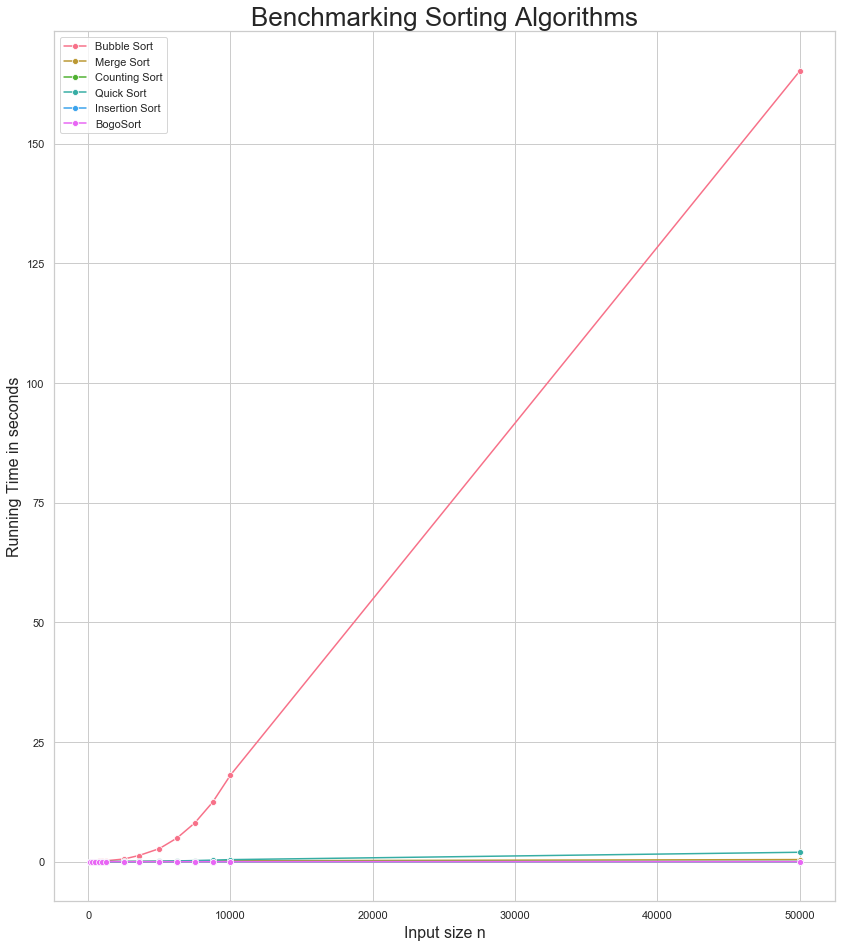

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", palette="husl", rc={'figure.figsize':(14,16)})

title="Benchmarking Sorting Algorithms"


# Bubble Sort
bubble = sns.lineplot( x="Size", y="Bubble Sort", data=df, marker='o', label='Bubble Sort')
# Merge sort
merge = sns.lineplot( x="Size", y="Merge Sort", data=df, marker='o', label='Merge Sort')
# Counting sort
counting = sns.lineplot( x="Size", y="Counting sort", marker='o', data=df, label="Counting Sort")
# Quick sort
quick = sns.lineplot( x="Size", y="Quick sort", data=df, marker='o',label="Quick Sort")
# Insertion sort
insert = sns.lineplot( x="Size", y="Insertion sort", data=df, marker='o', label="Insertion Sort")

# BogoSort
bogo = sns.lineplot( x="Size", y="BogoSort", data=df, marker='o', label="BogoSort")


plt.xlabel('Input size n', fontsize=16)
plt.ylabel('Running Time in seconds',fontsize=16)

# Increasing font size
plt.title(title, fontsize=26)

# Show the plot
plt.show()

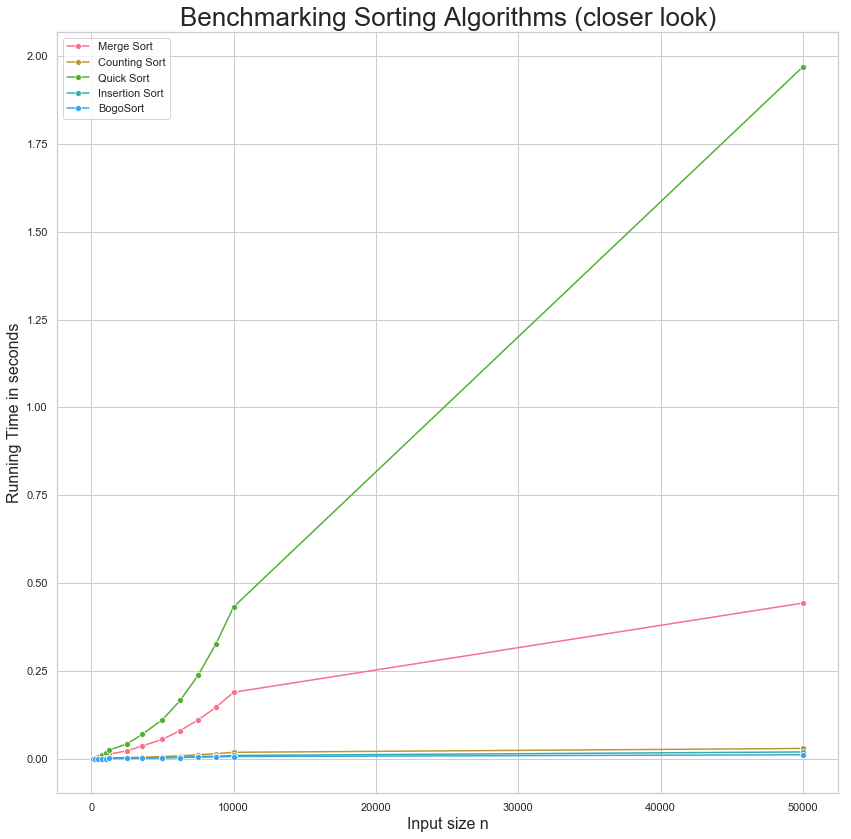

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", palette="husl", rc={'figure.figsize':(14,14)})

title="Benchmarking Sorting Algorithms (closer look)"


# Bubble Sort
#bubble = sns.lineplot( x="Size", y="Bubble Sort", data=df, marker='o', label='Bubble Sort')
# Merge sort
merge = sns.lineplot( x="Size", y="Merge Sort", data=df, marker='o', label='Merge Sort')
# Counting sort
counting = sns.lineplot( x="Size", y="Counting sort", marker='o', data=df, label="Counting Sort")
# Quick sort
quick = sns.lineplot( x="Size", y="Quick sort", data=df, marker='o',label="Quick Sort")
# Insertion sort
insert = sns.lineplot( x="Size", y="Insertion sort", data=df, marker='o', label="Insertion Sort")

# BogoSort
bogo = sns.lineplot( x="Size", y="BogoSort", data=df, marker='o', label="BogoSort")


plt.xlabel('Input size n', fontsize=16)
plt.ylabel('Running Time in seconds',fontsize=16)

# Increasing font size
plt.title(title, fontsize=26)


# Show the plot
plt.show()

## Conclusion

Here is a quick overview of the performance of each algorithm in their best, average and worse case. 

| Algorithm | Best  | Average | Worst  |
|-----------|------|------|------|
|   Bubble Sort  | O(n) |O(n2)|O(n2)|
|   Quick Sort     | O(n log n) |O(n log n)|O(n2))|
|   Merge Sort  | O(n log n) |O(n log n)|O(n log n)|
|   Counting Sort  | O(n +k) |O(n +k)|O(n +k)|
|   Insertion Sort     | O(n) |O(n2)|O(n2)|
|   BogoSort     | O(n) |(O(n+1)!)|(O(n+1)!)|

As you can see from the above graph, the slowest algorithm was Bubble Sort which was expected as it has the worst-case and average complexity of О(n2), where n is the number of items being sorted. It is the least practical algorithm and should be not be used in real life to solve problems.

Quick sort was the second slowest, because of the fact it is named 'quick sort' the expectation was that it would be faster however when looking at the Big-O Complexity chart it matches expected performance and merge sort does much better than it. Both these algorithms are O(n log n) and use the divide and conquer strategy. However Merge sort works faster and more efficient than quick sort in case of larger array size. Quick sort is 1.5s slower than Merge sort.

Counting sort and insertion sort perform great even when the numbers reach 50,000. Bogosort was the best performing algorithm which was very surprising considering the way it sorts it's array with random permutation and it's possibility to have the time complexity (O(n+1)!). However due to it's method of sorting I doubt it is very usable in real life. 


Image: Big O Cheatsheet (sourced from http://bigocheatsheet.com/_)

![title](bigo.png)